In [4]:
%pwd
import os
os.chdir('/gpfs/home/ap6924/yanailab/projects/ap6924/ast_cropseq_poolc/seurat_objects_preprocess/') # path to your data
%pwd

'/gpfs/data/yanailab/projects/ap6924/ast_cropseq_poolc/seurat_objects_preprocess'

In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
#import skmisc
#from skmisc.loess import loess # for variable genes seurat flavor
import hotspot
import muon as mu
import pickle

In [3]:
# Cell 3: Add the directory to sys.path and import skmisc
import sys

# Add the installation directory to sys.path
# Define the installation directory
install_dir = "/gpfs/home/ap6924/yanailab/projects/ap6924/ast_cropseq_poolb/hotspot"
sys.path.insert(0, install_dir)

# Try importing skmisc
try:
    import skmisc
    print("skmisc successfully imported.")
except ImportError as e:
    print(f"Failed to import skmisc: {e}")

from skmisc.loess import loess

skmisc successfully imported.


In [5]:
#adata = sc.read_h5ad("srt.cancer.filtered.h5ad")
metadata = pd.read_csv("combined_assigned_meta_data.csv")
expression_data = sc.read_csv("combined_assigned_rawcounts_genefilter.csv")
#protein_coding = pd.read_csv("mm10_protein_coding.csv")

In [6]:
metadata.head()

Unnamed: 0 orig.ident  nCount_RNA  nFeature_RNA  \
0  ct0_AAACCCATCACTTGGA-1_1       c1t0       15984          3894   
1  ct0_AAACGAACATCACAGT-1_1       c1t0       36014          5937   
2  ct0_AAACGCTAGTGACACG-1_1       c1t0       47201          6276   
3  ct0_AAACGCTTCTCCGAAA-1_1       c1t0        8469          2709   
4  ct0_AAAGAACCAGTCGCAC-1_1       c1t0        9328          2606   

         cell_barcode                gRNA       gene  number random sample  \
0  AAACCCATCACTTGGA-1  sgControl-142-gene  sgControl     142   gene    ct0   
1  AAACGAACATCACAGT-1       sgElf5-2-gene     sgElf5       2   gene    ct0   
2  AAACGCTAGTGACACG-1      sgKdm3a-6-gene    sgKdm3a       6   gene    ct0   
3  AAACGCTTCTCCGAAA-1      sgUhrf1-4-gene    sgUhrf1       4   gene    ct0   
4  AAAGAACCAGTCGCAC-1   sgControl-40-gene  sgControl      40   gene    ct0   

   ...  combined20_assigned_hotspot_module_11  \
0  ...                               0.063892   
1  ...                               0.362818   
2  ...                               0.273321   
3  ...                              -0.280733   
4  ...                              -0.054045   

   combined20_assigned_hotspot_module_21  \
0                               0.693544   
1                               0.624329   
2                               0.767296   
3                               0.231711   
4                               0.741697   

   combined20_assigned_hotspot_module_31  \
0                              -0.105514   
1                              -0.098558   
2                              -0.144897   
3                               0.065617   
4                              -0.191892   

   combined20_assigned_hotspot_module_41  \
0                               0.116091   
1                               0.081805   
2                               0.032784   
3                              -0.240913   
4                               0.316172   

   combined20_assigned_hotspot_module_51  \
0                               0.249113   
1                               0.361389   
2                               0.189090   
3                               0.745962   
4                               0.192442   

   combined20_assigned_hotspot_module_61  \
0                              -0.225198   
1                              -0.139459   
2                              -0.177664   
3                               0.085520   
4                              -0.004160   

   combined20_assigned_hotspot_module_71  \
0                              -0.181202   
1                              -0.119638   
2                              -0.217722   
3                               0.055461   
4                              -0.330976   

   combined20_assigned_hotspot_module_81  \
0                              -0.148476   
1                              -0.164562   
2                              -0.225727   
3                               0.244896   
4                              -0.275964   

   combined20_assigned_hotspot_module_91  sample_gene_combo  
0                              -0.037060      ct0_sgControl  
1                              -0.032630         ct0_sgElf5  
2                              -0.041944        ct0_sgKdm3a  
3                              -0.039710        ct0_sgUhrf1  
4                              -0.026423      ct0_sgControl  

[5 rows x 28 columns]

In [7]:
metadata.rename(columns={"Unnamed: 0": "Cells"}, inplace=True)

In [8]:
# data has to be transposed, here cells are rows and genes are columns
adata = sc.AnnData(expression_data.T)
# add metadata
adata.obs = metadata

In [9]:
adata.obs

Cells orig.ident  nCount_RNA  nFeature_RNA  \
0      ct0_AAACCCATCACTTGGA-1_1       c1t0       15984          3894   
1      ct0_AAACGAACATCACAGT-1_1       c1t0       36014          5937   
2      ct0_AAACGCTAGTGACACG-1_1       c1t0       47201          6276   
3      ct0_AAACGCTTCTCCGAAA-1_1       c1t0        8469          2709   
4      ct0_AAAGAACCAGTCGCAC-1_1       c1t0        9328          2606   
...                         ...        ...         ...           ...   
42211  ct3_TTTCATGGTGGCTCTG-1_6      c3t3b        8843          3041   
42212  ct3_TTTCGATGTTCGGACC-1_6      c3t3b        7070          2659   
42213  ct3_TTTCGATTCCACACAA-1_6      c3t3b       14273          4202   
42214  ct3_TTTGATCCAATGGCAG-1_6      c3t3b       21445          5047   
42215  ct3_TTTGGTTGTTAGGGTG-1_6      c3t3b       19418          4790   

             cell_barcode                gRNA       gene  number random  \
0      AAACCCATCACTTGGA-1  sgControl-142-gene  sgControl     142   gene   
1      AAACGAACATCACAGT-1       sgElf5-2-gene     sgElf5       2   gene   
2      AAACGCTAGTGACACG-1      sgKdm3a-6-gene    sgKdm3a       6   gene   
3      AAACGCTTCTCCGAAA-1      sgUhrf1-4-gene    sgUhrf1       4   gene   
4      AAAGAACCAGTCGCAC-1   sgControl-40-gene  sgControl      40   gene   
...                   ...                 ...        ...     ...    ...   
42211  TTTCATGGTGGCTCTG-1    sgSmarca1-2-gene  sgSmarca1       2   gene   
42212  TTTCGATGTTCGGACC-1       sgOtx1-2-gene     sgOtx1       2   gene   
42213  TTTCGATTCCACACAA-1      sgHdac7-1-gene    sgHdac7       1   gene   
42214  TTTGATCCAATGGCAG-1     sgArid1a-3-gene   sgArid1a       3   gene   
42215  TTTGGTTGTTAGGGTG-1     sgSmchd1-2-gene   sgSmchd1       2   gene   

      sample  ...  combined20_assigned_hotspot_module_11  \
0        ct0  ...                               0.063892   
1        ct0  ...                               0.362818   
2        ct0  ...                               0.273321   
3        ct0  ...                              -0.280733   
4        ct0  ...                              -0.054045   
...      ...  ...                                    ...   
42211    ct3  ...                              -0.282124   
42212    ct3  ...                              -0.279021   
42213    ct3  ...                              -0.267325   
42214    ct3  ...                              -0.333026   
42215    ct3  ...                              -0.330978   

       combined20_assigned_hotspot_module_21  \
0                                   0.693544   
1                                   0.624329   
2                                   0.767296   
3                                   0.231711   
4                                   0.741697   
...                                      ...   
42211                              -0.015955   
42212                               0.094932   
42213                              -0.009640   
42214                               0.020200   
42215                               0.034090   

       combined20_assigned_hotspot_module_31  \
0                                  -0.105514   
1                                  -0.098558   
2                                  -0.144897   
3                                   0.065617   
4                                  -0.191892   
...                                      ...   
42211                               0.583653   
42212                               0.591123   
42213                               0.474047   
42214                               0.553540   
42215                               0.390722   

       combined20_assigned_hotspot_module_41  \
0                                   0.116091   
1                                   0.081805   
2                                   0.032784   
3                                  -0.240913   
4                                   0.316172   
...                                      ...   
42211                              -0.269244   
4

In [10]:
sc.pp.filter_genes(adata, min_cells=10) # filter genes expressed in at least 10 cells
# subset only protein coding genes
#adata = adata[:, adata.var_names.isin(protein_coding['Gene name'])]

/gpfs/share/apps/anaconda3/gpu/new/envs/scvitools/lib/python3.9/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [11]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.layers["log_normalized"] = adata.X.copy()
adata.raw = adata

In [12]:
sc.pp.highly_variable_genes(adata, flavor='seurat_v3', n_top_genes=5000, layer="counts")

In [13]:
adata = adata[:, adata.var.highly_variable].copy()

In [14]:
adata

AnnData object with n_obs × n_vars = 42216 × 5000
    obs: 'Cells', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_barcode', 'gRNA', 'gene', 'number', 'random', 'sample', 'combined20_assigned_hotspot_module_101', 'combined20_assigned_hotspot_module_111', 'combined20_assigned_hotspot_module_121', 'combined20_assigned_hotspot_module_131', 'combined20_assigned_hotspot_module_141', 'combined20_assigned_hotspot_module_151', 'combined20_assigned_hotspot_module_161', 'combined20_assigned_hotspot_module_171', 'combined20_assigned_hotspot_module_11', 'combined20_assigned_hotspot_module_21', 'combined20_assigned_hotspot_module_31', 'combined20_assigned_hotspot_module_41', 'combined20_assigned_hotspot_module_51', 'combined20_assigned_hotspot_module_61', 'combined20_assigned_hotspot_module_71', 'combined20_assigned_hotspot_module_81', 'combined20_assigned_hotspot_module_91', 'sample_gene_combo'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'

In [15]:
# Scale and PCA
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack')

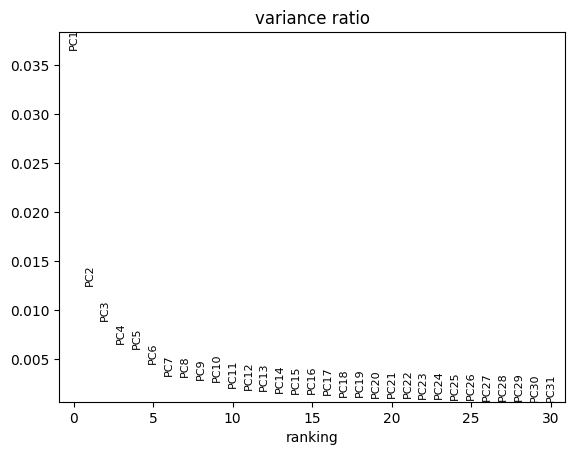

In [16]:
sc.pl.pca_variance_ratio(adata)

In [17]:
# rerun with fewer components
sc.tl.pca(adata, n_comps=15, svd_solver='arpack')

In [18]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=15)

In [19]:
sc.tl.umap(adata)

In [20]:
# Create the Hotspot object and the neighborhood graph
# hotspot works a lot faster with a csc matrix!
import scipy.sparse as sp
adata_csc = sp.csc_matrix(adata.layers["counts"])
# Assign the CSC matrix to the desired layer
adata.layers["counts_csc"] = adata_csc
#adata.layers["counts_csc"] = adata.layers["counts"].tocsc()
hs = hotspot.Hotspot(
    adata,
    layer_key="counts_csc",
    model='danb',
    latent_obsm_key="X_pca",
    umi_counts_obs_key="nCount_RNA"
)

In [21]:
hs.create_knn_graph(
    weighted_graph=False, n_neighbors=30,
)

In [22]:
hs_results = hs.compute_autocorrelations(jobs=6)

#hs_results.head(15)

100%|██████████| 5000/5000 [00:30<00:00, 164.95it/s]


In [23]:
test_genes = hs_results.loc[hs_results.FDR < 0.05].sort_values('Z', ascending=False)

In [24]:
test_genes.shape[0]

4545

In [25]:
# Select the genes with significant lineage autocorrelation
hs_genes = hs_results.loc[hs_results.FDR < 0.01].sort_values('Z', ascending=False).head(1000).index

# Compute pair-wise local correlations between these genes
lcz = hs.compute_local_correlations(hs_genes, jobs=6)

Computing pair-wise local correlation on 1000 features...


100%|██████████| 499500/499500 [29:42<00:00, 280.18it/s]


In [26]:
modules = hs.create_modules(
    min_gene_threshold=20, core_only=True, fdr_threshold=0.01
)

modules.value_counts()

Module
-1     164
 2     114
 1     110
 3      88
 4      81
 5      66
 11     64
 6      56
 14     50
 9      48
 12     40
 8      29
 10     26
 13     23
 7      21
 15     20
Name: count, dtype: int64

In [32]:
# this is the original function that I copied and added plt.savefig so I can save a pdf! 
# probably a weird way but it works!

# this saves a pdf of the heatmap... it could be that it shows it is still running but the plot is saved, it's weird

def hotspot_correlation_plot(
            local_correlation_z, modules, linkage,
            mod_cmap='tab10', vmin=-100, vmax=100,
            z_cmap='RdBu_r', yticklabels=False
):

    import seaborn as sns
    from scipy.cluster.hierarchy import leaves_list
    
    row_colors = None
    colors = list(plt.get_cmap(mod_cmap).colors)
    module_colors = {i: colors[(i-1) % len(colors)] for i in modules.unique()}
    module_colors[-1] = '#ffffff'

    row_colors1 = pd.Series(
        [module_colors[i] for i in modules],
        index=local_correlation_z.index,
    )

    row_colors = pd.DataFrame({
        "Modules": row_colors1,
    })

    cm = sns.clustermap(
        local_correlation_z,
        row_linkage=linkage,
        col_linkage=linkage,
        vmin=vmin,
        vmax=vmax,
        cmap=z_cmap,
        xticklabels=False,
        yticklabels=yticklabels,
        row_colors=row_colors,
        rasterized=True,
    )

    fig = plt.gcf()
    plt.sca(cm.ax_heatmap)
    plt.ylabel("")
    plt.xlabel("")

    cm.ax_row_dendrogram.remove()

    # Add 'module X' annotations
    ii = leaves_list(linkage)

    mod_reordered = modules.iloc[ii]

    mod_map = {}
    y = np.arange(modules.size)

    for x in mod_reordered.unique():
        if x == -1:
            continue

        mod_map[x] = y[mod_reordered == x].mean()

    plt.sca(cm.ax_row_colors)
    for mod, mod_y in mod_map.items():
        plt.text(-.5, y=mod_y, s="Module {}".format(mod),
                 horizontalalignment='right',
                 verticalalignment='center')
    plt.xticks([])

    # Find the colorbar 'child' and modify
    min_delta = 1e99
    min_aa = None
    for aa in fig.get_children():
        try:
            bbox = aa.get_position()
            delta = (0-bbox.xmin)**2 + (1-bbox.ymax)**2
            if delta < min_delta:
                delta = min_delta
                min_aa = aa
        except AttributeError:
            pass

    min_aa.set_ylabel('Z-Scores')
    min_aa.yaxis.set_label_position("left")
    plt.savefig('combined_testgenes.05_assigned_hotspot_heatmap.pdf', format='pdf')

In [33]:
hotspot_correlation_plot(hs.local_correlation_z, hs.modules, hs.linkage)

In [ ]:
# Show the top genes for a module

module = 13
results = hs.results.join(hs.modules)
results = results.loc[results.Module == module]

results.sort_values('Z', ascending=False)

In [29]:
# saving modules in csv
for module in range(1,18):
    results = hs.results.join(hs.modules)
    results = results.loc[results.Module == module]
    results.sort_values('Z', ascending=False)
    results.to_csv(f'combined_testgenes.05_assigned_hotspot_module_{module}.csv')

# Saving the adata and hotspot objects

In [ ]:
# Save adata and modules objects
adata.write('ct0_assigned_hotspot_analysis.h5ad')

In [ ]:
# save hotspot stuff
# Your collection of Python objects (list, dictionary, etc.)
hotspot_objects = [hs, hs_results, hs_genes, lcz, modules]  # Replace with your collection of objects

# File path to save the objects
hotspot_file = 'ct0_assigned_rna_hotspot.pkl'

# Open a file in binary write mode and save the objects using pickle.dump
with open(hotspot_file, 'wb') as file:
    pickle.dump(hotspot_objects, file)

In [ ]:
hs.local_correlation_z
hs.local_correlation_z.to_csv('ct0_assigned_local_correlation_z_scores.csv')